In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,State,Age,python,r_studio,spark,aws,excel
0,Senior Data Scientist,$109K - $175K (Glassdoor est.),Job Posting Title\r\nSenior Data Scientist\r\n...,3.2,Big Fish Games\r\n3.2,"Oakland, CA",501 to 1000 Employees,2002,Subsidiary or Business Segment,Video Games,...,175,142.0,Big Fish Games\r\n,CA,18,0,0,0,0,0
1,Data Scientist Technical Specialist,$93K - $153K (Glassdoor est.),Technology is constantly changing and our adve...,3.7,Peraton\r\n3.7,"Chantilly, VA",1001 to 5000 Employees,2017,Company - Private,Aerospace & Defense,...,153,123.0,Peraton\r\n,VA,3,0,0,0,0,0
2,Data Analyst,$40K - $73K (Glassdoor est.),This position will be responsible for the deve...,3.6,Bell Partners\r\n3.6,"Raleigh, NC",1001 to 5000 Employees,1976,Company - Private,Real Estate,...,73,56.5,Bell Partners\r\n,NC,44,0,0,0,0,0
3,Marketing Scientist I,$48K - $103K (Glassdoor est.),Valassis is a leader in the marketing technolo...,3.3,Valassis\r\n3.3,"Livonia, MI",1001 to 5000 Employees,1970,Company - Private,Advertising & Marketing,...,103,75.5,Valassis\r\n,MI,50,0,0,0,0,0
4,"Scientist, Product Development",$50K - $93K (Glassdoor est.),Summary:\r\nMetagenics is a global lifestyle m...,3.1,Metagenics\r\n3.1,"Gig Harbor, WA",201 to 500 Employees,1983,Company - Private,Health Care Services & Hospitals,...,93,71.5,Metagenics\r\n,WA,37,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'State', 'Age', 'python', 'r_studio',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif ' director' in title.lower():
        return 'director'
    else:
        return 'na'
    

    
    #-----------------
    #job title and seniority
    
    ##Fix state los Angeles



In [6]:
df['job_simplified'] =df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simplified.value_counts()

data scientist      961
analyst              93
na                   73
data engineer        55
machine learning     24
manager              10
director              1
Name: job_simplified, dtype: int64

In [8]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or'jenior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [9]:
df['seniority'] =df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        1122
senior      92
jr           3
Name: seniority, dtype: int64

In [10]:
df.State.value_counts()

 CA    283
 NY    165
 VA    155
 MA     86
 MD     71
 IL     38
 NC     36
 TX     32
 GA     29
 DC     28
 WA     28
 MO     20
 FL     20
 NJ     18
 PA     17
 UT     16
 MI     14
 OH     12
 MN     10
 WI      9
 CO      8
 IN      7
 OR      6
 KY      5
 AL      4
 AR      4
 CT      4
 NE      3
 TN      3
 AZ      2
 NM      2
 NH      2
 ME      2
 MT      1
 RI      1
 OK      1
 ID      1
 AK      1
 SC      1
 KS      1
 ND      1
Name: State, dtype: int64

In [11]:
df['desc_length'] =df['Job Description'].apply(lambda x:len(x))
df['desc_length']

0       1165
1       1020
2       1014
3       1064
4        925
        ... 
1212    1023
1213    1468
1214     866
1215    1230
1216     788
Name: desc_length, Length: 1217, dtype: int64

In [13]:
df[['min_salary','max_salary']]

,min_salary,max_salary
0,109,175
1,93,153
2,40,73
3,48,103
4,50,93
...,...,...
1212,88,146
1213,67,112
1214,98,156
1215,83,141


In [15]:
df.company_txt = df.company_txt.apply(lambda x:x.replace('\r\n',''))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,State,Age,python,r_studio,spark,aws,excel,job_simplified,seniority,desc_length
0,Senior Data Scientist,$109K - $175K (Glassdoor est.),Job Posting Title\r\nSenior Data Scientist\r\n...,3.2,Big Fish Games\r\n3.2,"Oakland, CA",501 to 1000 Employees,2002,Subsidiary or Business Segment,Video Games,...,CA,18,0,0,0,0,0,data scientist,senior,1165
1,Data Scientist Technical Specialist,$93K - $153K (Glassdoor est.),Technology is constantly changing and our adve...,3.7,Peraton\r\n3.7,"Chantilly, VA",1001 to 5000 Employees,2017,Company - Private,Aerospace & Defense,...,VA,3,0,0,0,0,0,data scientist,na,1020
2,Data Analyst,$40K - $73K (Glassdoor est.),This position will be responsible for the deve...,3.6,Bell Partners\r\n3.6,"Raleigh, NC",1001 to 5000 Employees,1976,Company - Private,Real Estate,...,NC,44,0,0,0,0,0,analyst,na,1014
3,Marketing Scientist I,$48K - $103K (Glassdoor est.),Valassis is a leader in the marketing technolo...,3.3,Valassis\r\n3.3,"Livonia, MI",1001 to 5000 Employees,1970,Company - Private,Advertising & Marketing,...,MI,50,0,0,0,0,0,na,na,1064
4,"Scientist, Product Development",$50K - $93K (Glassdoor est.),Summary:\r\nMetagenics is a global lifestyle m...,3.1,Metagenics\r\n3.1,"Gig Harbor, WA",201 to 500 Employees,1983,Company - Private,Health Care Services & Hospitals,...,WA,37,0,0,0,0,0,na,na,925


In [16]:
df['company_txt']

0       Big Fish Games
1              Peraton
2        Bell Partners
3             Valassis
4           Metagenics
             ...      
1212         steampunk
1213               VTG
1214       MobiTV, Inc
1215             WebMD
1216           Invicro
Name: company_txt, Length: 1217, dtype: object

In [17]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,Age,python,r_studio,spark,aws,excel,desc_length
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,3.581841,1706.496302,84.685292,139.883320,112.284306,26.070666,0.069844,0.002465,0.020542,0.058340,0.078882,1335.691865
std,1.327285,696.262958,18.348564,25.472919,21.798034,37.081790,0.254989,0.049609,0.141904,0.234482,0.269666,898.448798
min,-1.000000,-1.000000,35.000000,62.000000,49.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,3.500000,1961.000000,69.000000,120.000000,93.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,803.000000
50%,3.900000,2001.000000,83.000000,142.000000,112.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1046.000000
75%,4.200000,2010.000000,97.000000,155.000000,127.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1481.000000
max,5.000000,2019.000000,121.000000,193.000000,157.000000,236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7217.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'State', 'Age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [24]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,State,Age,python,r_studio,spark,aws,excel,job_simplified,seniority,desc_length
0,Senior Data Scientist,$109K - $175K (Glassdoor est.),Job Posting Title\r\nSenior Data Scientist\r\n...,3.2,Big Fish Games\r\n3.2,"Oakland, CA",501 to 1000 Employees,2002,Subsidiary or Business Segment,Video Games,...,CA,18,0,0,0,0,0,data scientist,senior,1165
1,Data Scientist Technical Specialist,$93K - $153K (Glassdoor est.),Technology is constantly changing and our adve...,3.7,Peraton\r\n3.7,"Chantilly, VA",1001 to 5000 Employees,2017,Company - Private,Aerospace & Defense,...,VA,3,0,0,0,0,0,data scientist,na,1020
2,Data Analyst,$40K - $73K (Glassdoor est.),This position will be responsible for the deve...,3.6,Bell Partners\r\n3.6,"Raleigh, NC",1001 to 5000 Employees,1976,Company - Private,Real Estate,...,NC,44,0,0,0,0,0,analyst,na,1014
3,Marketing Scientist I,$48K - $103K (Glassdoor est.),Valassis is a leader in the marketing technolo...,3.3,Valassis\r\n3.3,"Livonia, MI",1001 to 5000 Employees,1970,Company - Private,Advertising & Marketing,...,MI,50,0,0,0,0,0,na,na,1064
4,"Scientist, Product Development",$50K - $93K (Glassdoor est.),Summary:\r\nMetagenics is a global lifestyle m...,3.1,Metagenics\r\n3.1,"Gig Harbor, WA",201 to 500 Employees,1983,Company - Private,Health Care Services & Hospitals,...,WA,37,0,0,0,0,0,na,na,925


<AxesSubplot:>

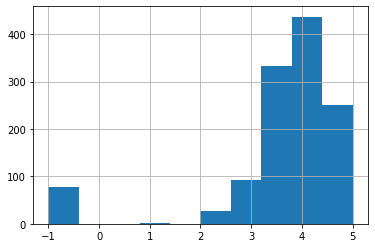

In [19]:
df.Rating.hist()

<AxesSubplot:>

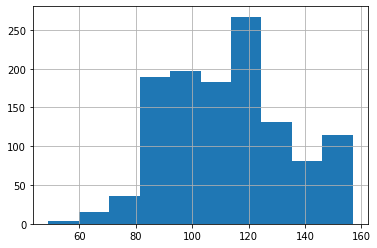

In [20]:
df.avg_salary.hist()

<AxesSubplot:>

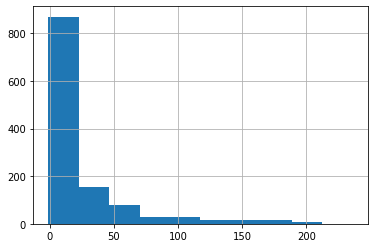

In [21]:
df.Age.hist()

<AxesSubplot:>

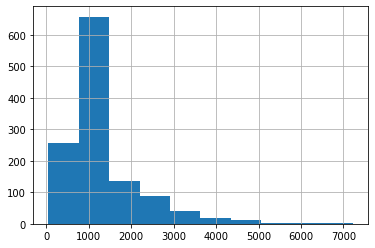

In [22]:
df.desc_length.hist()

<AxesSubplot:>

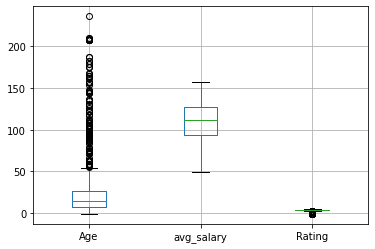

In [23]:
df.boxplot(column =['Age','avg_salary','Rating'])

<AxesSubplot:>

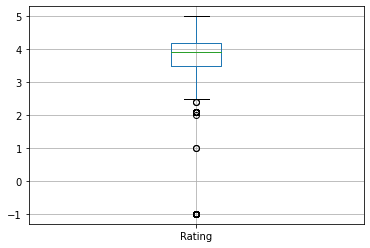

In [25]:
df.boxplot(column =['Rating'])

In [26]:
df[['Age','avg_salary','Rating','desc_length']].corr()

,Age,avg_salary,Rating,desc_length
Age,1.000000,-0.063348,0.119531,0.167242
avg_salary,-0.063348,1.000000,0.025014,0.015715
Rating,0.119531,0.025014,1.000000,0.092531
desc_length,0.167242,0.015715,0.092531,1.000000


<AxesSubplot:>

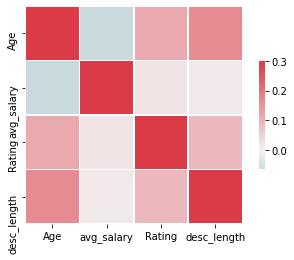

In [27]:
cmap =sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(df[['Age','avg_salary','Rating','desc_length']].corr(),vmax = .3,center = 0,cmap =cmap,
square=True,linewidth =.5,cbar_kws ={"shrink": .5})

In [ ]:
# Categorical Variables
df.columns

In [28]:
df_categorical = df[['Location','Size','Industry','Sector','Revenue','company_txt','State','python','r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority']]
print(df_categorical)

            Location                    Size  \
0        Oakland, CA   501 to 1000 Employees   
1      Chantilly, VA  1001 to 5000 Employees   
2        Raleigh, NC  1001 to 5000 Employees   
3        Livonia, MI  1001 to 5000 Employees   
4     Gig Harbor, WA    201 to 500 Employees   
...              ...                     ...   
1212      McLean, VA    201 to 500 Employees   
1213  Alexandria, VA  1001 to 5000 Employees   
1214  Emeryville, CA    201 to 500 Employees   
1215    New York, NY  1001 to 5000 Employees   
1216      Boston, MA    201 to 500 Employees   

                              Industry                     Sector  \
0                          Video Games                      Media   
1                  Aerospace & Defense        Aerospace & Defense   
2                          Real Estate                Real Estate   
3              Advertising & Marketing          Business Services   
4     Health Care Services & Hospitals                Health Care   
...      

Graph for Location: total =239


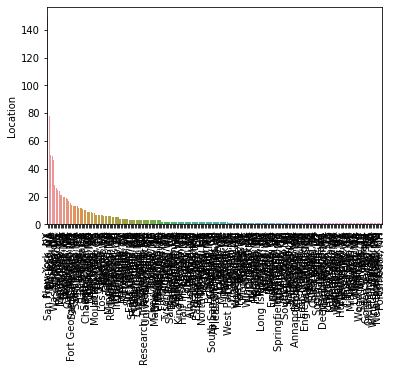

Graph for Size: total =9


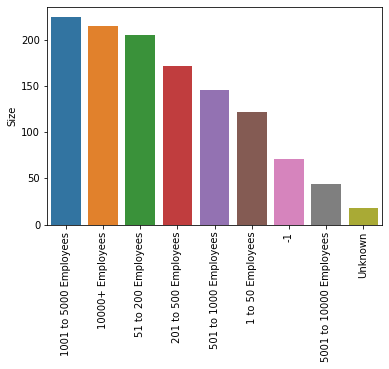

Graph for Industry: total =78


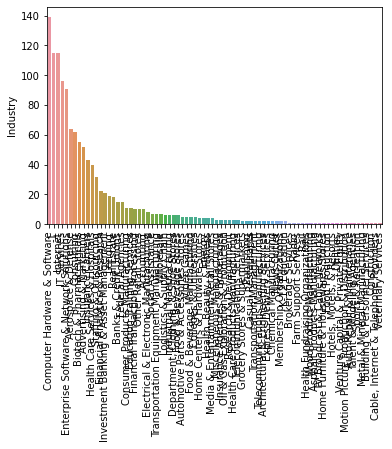

Graph for Sector: total =25


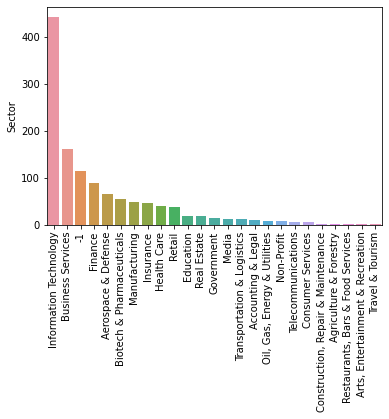

Graph for Revenue: total =14


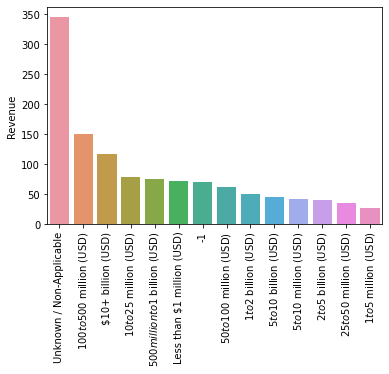

Graph for company_txt: total =595


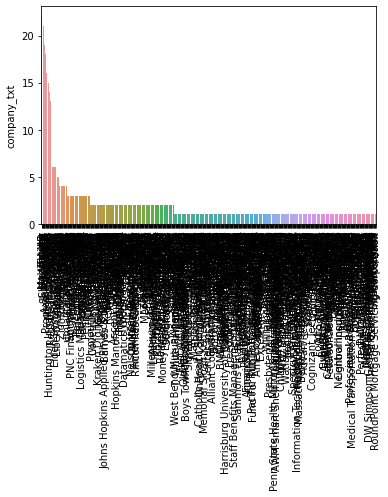

Graph for State: total =41


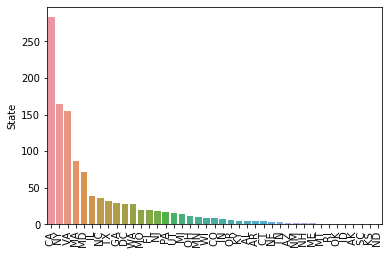

Graph for python: total =2


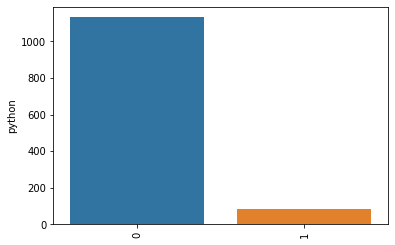

Graph for r_studio: total =2


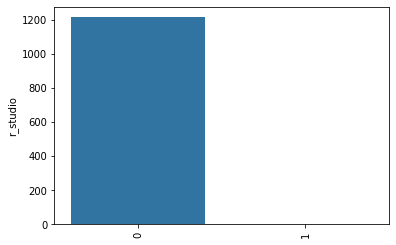

Graph for spark: total =2


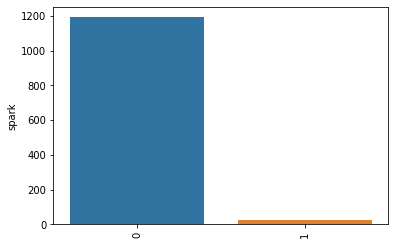

Graph for aws: total =2


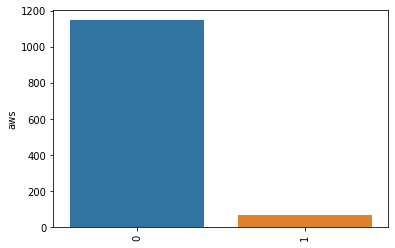

Graph for excel: total =2


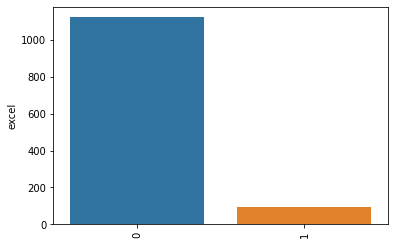

Graph for job_simplified: total =7


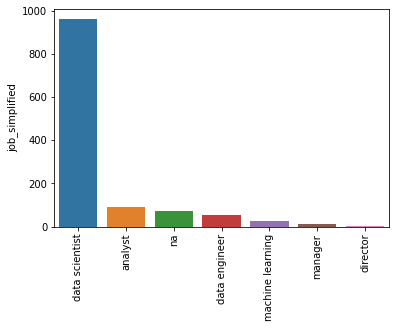

Graph for seniority: total =3


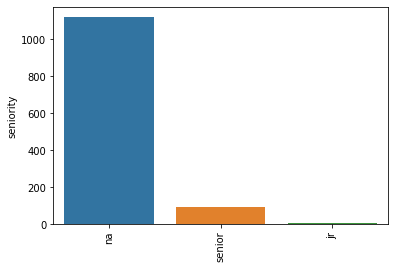

In [29]:
for i in df_categorical.columns:
    cat_num =df_categorical[i].value_counts()
    print("Graph for %s: total =%d" %(i, len(cat_num)))
    chart=sns.barplot(x =cat_num.index,y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
    plt.show()

Graph for Location: total =20


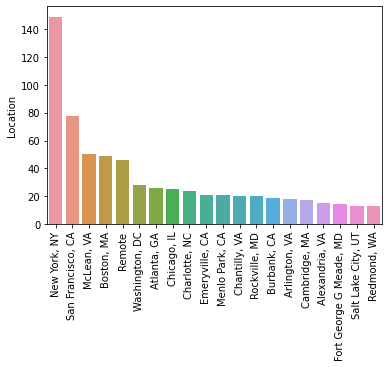

Graph for company_txt: total =20


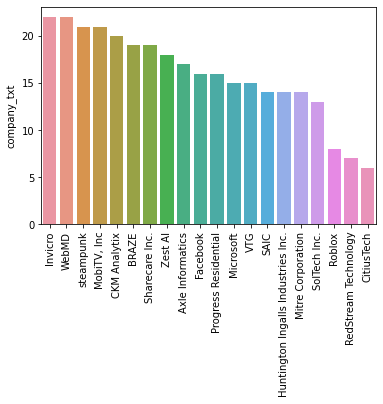

In [30]:
for i in df_categorical[['Location','company_txt']].columns:
    cat_num =df_categorical[i].value_counts()[:20]
    print("Graph for %s: total =%d" %(i, len(cat_num)))
    chart=sns.barplot(x =cat_num.index,y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
    plt.show()

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'State', 'Age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [32]:
pd.pivot_table(df,index='job_simplified',values ='avg_salary')

,avg_salary
job_simplified,
analyst,108.607527
data engineer,112.454545
data scientist,112.607180
director,93.500000
machine learning,113.062500
manager,114.500000
na,112.287671


In [33]:
pd.pivot_table(df,index=['job_simplified','seniority'],values ='avg_salary')

avg_salary
job_simplified   seniority            
analyst          jr          92.000000
                 na         108.379747
                 senior     111.269231
data engineer    na         112.489796
                 senior     112.166667
data scientist   na         112.696231
                 senior     111.245763
director         na          93.500000
machine learning na         115.526316
                 senior     103.700000
manager          na         114.500000
na               jr         124.250000
                 na         111.661290
                 senior     113.944444

In [34]:
pd.pivot_table(df,index='State',values ='avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
State,
ID,149.500000
AK,128.500000
SC,128.500000
IN,126.000000
AR,124.625000
WA,122.089286
CA,122.054770
CO,119.062500
UT,118.093750


In [35]:
pd.pivot_table(df,index=['State','job_simplified'],values ='avg_salary').sort_values('State',ascending = False)

avg_salary
State job_simplified            
 WI   manager         116.500000
      data scientist  124.500000
      data engineer    82.000000
      analyst         112.400000
 WA   na              128.133333
...                          ...
 AR   data scientist  124.625000
 AL   data scientist  108.250000
      analyst         116.500000
      manager         116.500000
 AK   na              128.500000

[113 rows x 1 columns]

In [36]:
#To make visible all rows
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [37]:
pd.pivot_table(df,index=['State','job_simplified'],values ='avg_salary',aggfunc='count').sort_values('State',ascending = False)

avg_salary
State job_simplified              
 WI   manager                    1
      data scientist             2
      data engineer              1
      analyst                    5
 WA   na                        15
      data scientist            10
      analyst                    3
 VA   machine learning           3
      data engineer             11
      data scientist           131
      analyst                    4
      manager                    2
      na                         4
 UT   data scientist             9
      data engineer              3
      analyst                    4
 TX   na                         2
      manager                    2
      data scientist            18
      data engineer              2
      analyst                    8
 TN   data scientist             3
 SC   na                         1
 RI   analyst                    1
 PA   data scientist             7
      data engineer              4
      analyst                    2
      na                         4
 OR   data scientist             3
      analyst                    3
 OK   analyst                    1
 OH   na                         1
      data scientist             9
      analyst                    2
 NY   na                         3
      machine learning           2
      data scientist           153
      data engineer              3
      analyst                    4
 NM   data scientist             2
 NJ   data scientist            12
      analyst                    1
      na                         4
      manager                    1
 NH   data engineer              2
 NE   na                         1
      data scientist             1
      analyst                    1
 ND   analyst                    1
 NC   manager                    1
      data scientist            31
      analyst                    4
 MT   na                         1
 MO   data engineer              4
      na                         2
      data scientist            12
      analyst                    2
 MN   na                         1
      data scientist             8
      data engineer              1
 MI   na                         1
      machine learning           1
      data scientist            10
      data engineer              1
      analyst                    1
 ME   data scientist             2
 MD   data scientist            61
      data engineer              2
      analyst                    5
      na                         3
 MA   na                         4
      manager                    1
      machine learning           5
      data scientist            61
      data engineer              7
      analyst                    8
 KY   na                         1
      data scientist             4
 KS   analyst                    1
 IN   na                         2
      data scientist             3
      analyst                    2
 IL   data scientist            27
      analyst                    9
      na                         2
 ID   data engineer              1
 GA   data scientist            23
      data engineer              2
      analyst                    4
 FL   na                         5
      data scientist             9
      data engineer              3
      analyst                    3
 DC   data engineer              1
      analyst                    3
      data scientist            22
      director                   1
      na                         1
 CT   data scientist             3
      analyst                    1
 CO   data scientist             8
 CA   na                        13
      manager                    1
      machine learning           9
      data scientist           249
      data engineer              5
      analyst                    6
 AZ   data scientist             2
 AR   data scientist             4
 AL   data scientist             2
      analyst                    1
      manager                    1
 AK   na                         1

In [38]:
pd.pivot_table(df[df.job_simplified == 'data scientist'],index=['State','job_simplified'],values ='avg_salary').sort_values('avg_salary',ascending = False)

,,avg_salary
State,job_simplified,
OR,data scientist,128.833333
UT,data scientist,127.833333
AR,data scientist,124.625000
WI,data scientist,124.500000
CA,data scientist,123.959839
WA,data scientist,120.450000
CO,data scientist,119.062500
PA,data scientist,116.357143
GA,data scientist,115.608696


In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'State', 'Age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'desc_length'],
      dtype='object')

In [44]:
#Salary rating, industry, sector, revenue, number of comp, hourly, employer provided,python,r,spark,aws,excel,desclen
df_pivots = df[['Rating','Industry','Sector','Revenue','python','r_studio','spark','aws','excel','avg_salary']]

In [45]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending =False))

Rating
        avg_salary
Rating            
 2.1    125.840909
 4.4    123.765957
 4.5    120.868421
 2.4    119.750000
 4.8    119.147059
 3.6    118.746032
 5.0    118.500000
 1.0    118.500000
 4.7    118.368421
 4.9    117.483333
 3.2    116.125000
 4.1    115.574468
 2.5    115.500000
 4.2    115.453947
 3.4    114.194444
-1.0    113.850649
 3.3    113.800000
 3.8    113.000000
 4.6    112.592593
 2.7    111.666667
 3.7    110.494681
 4.3    107.300000
 3.5    106.500000
 3.9    105.802198
 4.0    105.306723
 2.6    105.200000
 2.8    102.750000
 3.0    102.215517
 3.1    102.187500
 2.9    101.900000
 2.0     93.500000
Industry
                                          avg_salary
Industry                                            
Financial Analytics & Research            149.250000
Oil & Gas Exploration & Production        142.500000
Health, Beauty, & Fitness                 138.125000
Hotels, Motels, & Resorts                 136.500000
Media & Entertainment Retail Stores    

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [46]:
pd.pivot_table(df_pivots,index='Revenue',columns='python',values='avg_salary',aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),50.0,1.0
$1 to $5 million (USD),22.0,6.0
$10 to $25 million (USD),72.0,7.0
$10+ billion (USD),102.0,16.0
$100 to $500 million (USD),141.0,10.0
$2 to $5 billion (USD),35.0,5.0
$25 to $50 million (USD),34.0,2.0
$5 to $10 billion (USD),45.0,NaN
$5 to $10 million (USD),41.0,2.0


In [47]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
# nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91720\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91720\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91720\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<function matplotlib.pyplot.show(close=None, block=None)>

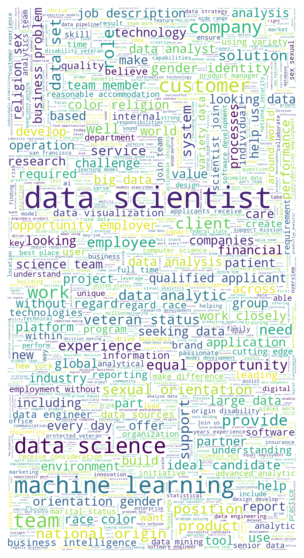

In [53]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from matplotlib import pyplot as plt 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """Removes punctuation and stop words"""
    filtered =[]
    stop_words = set(stopwords.words('english'))
    word_tokens =word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text =" ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words =2000,width =800,height =1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show